### ปริยวิศว์ เตชะกฤตเมธีธำรง 6510450593

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fertility.csv')
df.head()

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,30,no,80,yes,more than 3 months ago,once a week,occasional,engineer,16,Normal
1,35,yes,140,yes,less than 3 hours a week,once a week,daily,engineer,6,weak
2,27,yes,99,no,more than 3 months ago,hardly ever or never,never,engineer,9,Normal
3,32,no,96,yes,more than 3 months ago,hardly ever or never,never,engineer,7,Normal
4,30,yes,134,no,less than 3 hours a week,once a week,never,engineer,9,weak


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;กระทรวงสาธารณสุขต้องการเพิ่มจำานวนประชากรจึงมีการเก็บข้อมูลภาวะการมีบุตรยากของเพศชาย (Diagnosis) ว่าปกติหรืออ่อนแอ (normal/weak) โดยเก็บข้อมูลที่ประกอบด้วยข้อมูลสุขภาพ ได้แก่ ภาวะโรคไต (Kidney disease) ระดับนํ้าตาลในเลือด (Fasting blood sugar) การติดเชื้อในทางเดินปัสสาวะ (Uri infection) รวมถึงพฤติกรรมการใช้ชีวิต ได้แก่ การออกกำาลังกาย (exercise habit) การดื่มสุรา (Frequency of alcohol consumption) การสูบบุหรี่ (Smoking habit) จำานวนชั่วโมงที่นั่งอยู่กับที่ (#hours sit) อายุ และอาชีพ

ให้นิสิตใช้ขั้นตอนวิธีต้นไม้ตัดสินใจเรียนรู้จากชุดข้อมูล Cancer วัดประสิทธิภาพ และแสดงผลภาพต้นไม้**


### ทำ Label Encoding แยกค่าใน column ให้เป็นตัวเลข

In [4]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head()

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,30,0,80,1,2,2,2,1,16,0
1,35,1,140,1,0,2,0,1,6,1
2,27,1,99,0,2,1,1,1,9,0
3,32,0,96,1,2,1,1,1,7,0
4,30,1,134,0,0,2,1,1,9,1


### แบ่ง train set และ test set X = features y = target (Diagnosis)

In [5]:
X = df.iloc[:, :-1]
y = df['Diagnosis']

X_train, X_test, y_test, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=123)

In [6]:
model = DecisionTreeClassifier()
model.fit(X, y) # train model

DecisionTreeClassifier()

### แสดงผลภาพต้นไม้

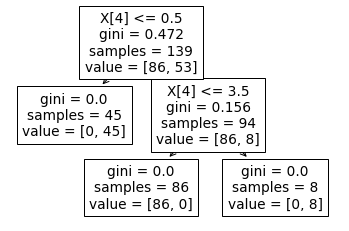

In [7]:
tree.plot_tree(model)
plt.show()

### เปรียบเทียบค่าที่ทำนายได้กับเฉลย

In [8]:
y_pred = model.predict(X_test)

y_pred, y_test.values

(array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1]),
 array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1]))

### วัดประสิทธิภาพโมเดล

In [9]:
accuracy_score(y_test, y_pred) # แสดงความแม่นยำของโมเดล

1.0

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        18

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

